In [1]:
import pandas as pd

In [2]:
path = '/content/drive/MyDrive/Data Science Projects/Market Sales Regression Analysis/Stores.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [4]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [5]:
print('Numbers of rows in the data frame is: {}'.format(df.shape[0]))

Numbers of rows in the data frame is: 896


In [6]:
df['Store_Sales'].idxmax()

649

In [7]:
df.iloc[649]

Store ID                   650
Store_Area                1989
Items_Available           2414
Daily_Customer_Count       860
Store_Sales             116320
Name: 649, dtype: int64

In [8]:
df['Store_Sales'].idxmin()

31

In [9]:
df.iloc[31]

Store ID                   32
Store_Area               1250
Items_Available          1508
Daily_Customer_Count      990
Store_Sales             14920
Name: 31, dtype: int64

In [10]:
df.drop('Store ID ', axis=1, inplace=True)
df

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620
...,...,...,...,...
891,1582,1910,1080,66390
892,1387,1663,850,82080
893,1200,1436,1060,76440
894,1299,1560,770,96610


In [11]:
df.duplicated().sum()

0

In [12]:
df.isna()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
891,False,False,False,False
892,False,False,False,False
893,False,False,False,False
894,False,False,False,False


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


In [14]:
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


In [15]:
df.corr()['Store_Sales'].sort_values()

Daily_Customer_Count    0.008629
Store_Area              0.097474
Items_Available         0.098849
Store_Sales             1.000000
Name: Store_Sales, dtype: float64

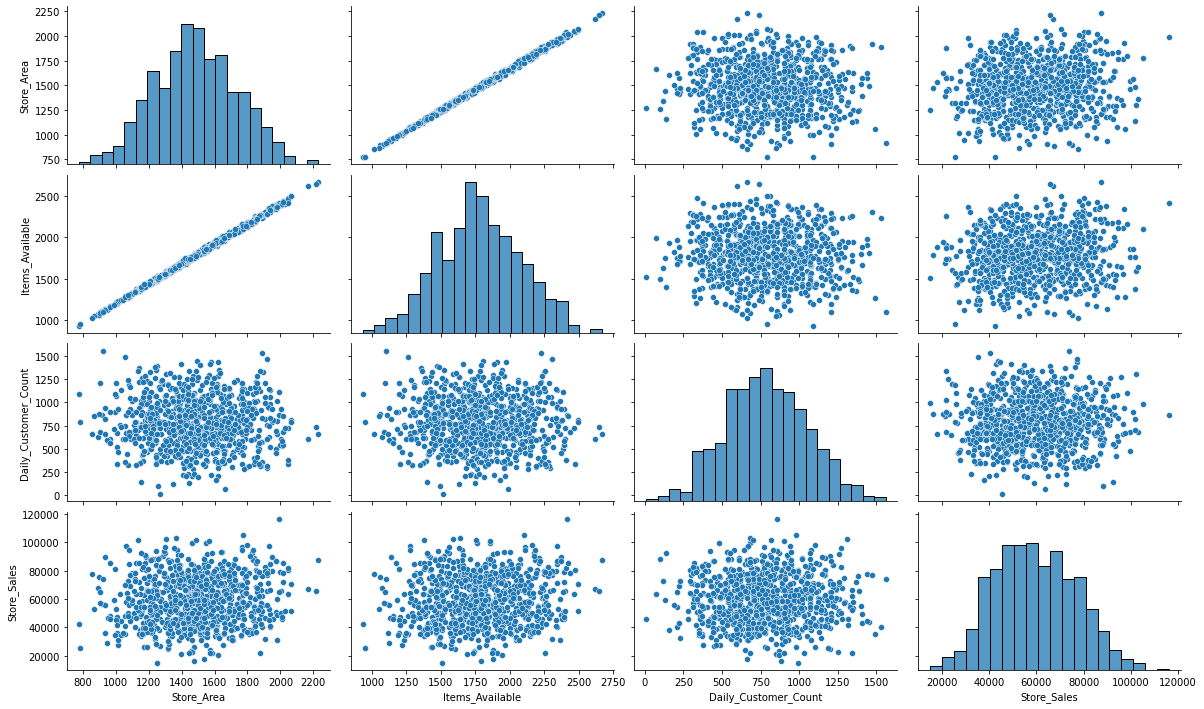

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, aspect= 1.7)
plt.show()

<Figure size 1600x900 with 0 Axes>

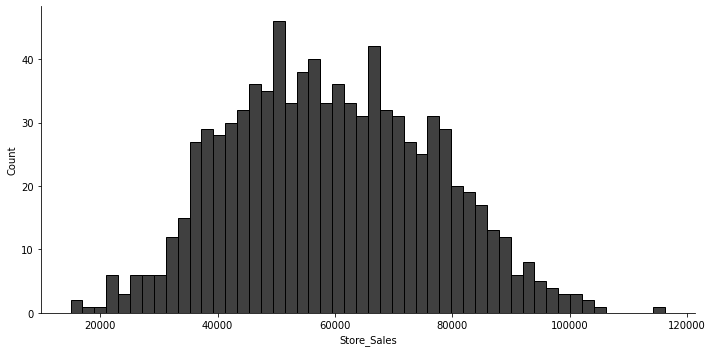

In [17]:
plt.figure(figsize=(8,4.5), dpi=200)
sns.displot(data=df, x='Store_Sales', bins=50, color='black', aspect=2)
plt.show()

In [18]:
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


In [19]:
IQR_Daily_costumer_count = 970-600
upper_limit = 970 + (1.5 * IQR_Daily_costumer_count)
lower_limit = 600 - (1.5 * IQR_Daily_costumer_count)

In [20]:
import numpy as np

In [21]:
df.loc[df['Daily_Customer_Count']>upper_limit] = np.nan
df.loc[df['Daily_Customer_Count']<lower_limit] = np.nan

In [22]:
df.dropna(axis=0, inplace=True)

In [23]:
X = df[['Store_Area', 'Items_Available', 'Daily_Customer_Count']]

In [24]:
y = df['Store_Sales']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 100, test_size=0.33)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
def model_results(predictions):
  print('The mean absolute error is: {}'.format(mean_absolute_error(y_test, predictions)))
  print('The mean squared error is: {}'.format(np.sqrt(mean_squared_error(y_test, predictions))))

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [30]:
lr.fit(scaled_X_train, y_train)
predictions_lr = lr.predict(scaled_X_test)

In [31]:
model_results(predictions_lr)

The mean absolute error is: 14337.29552436505
The mean squared error is: 17370.872403841604


In [32]:
from sklearn.svm import SVR
svr = SVR()

In [33]:
svr.fit(scaled_X_train, y_train)
predictions_svr = svr.predict(scaled_X_test)

In [34]:
model_results(predictions_svr)

The mean absolute error is: 14415.749360895003
The mean squared error is: 17487.255831546852


In [35]:
from sklearn.model_selection import GridSearchCV
param_gridsvr = {'C':[0.001, 0.01, 0.1, 0.5, 1], 'kernel':['linear', 'rbf', 'poly'], 'gamma':['scale', 'auto'], 'degree':[2,3,4,5,6,7]}
gridsvr = GridSearchCV(svr, param_gridsvr)

In [36]:
gridsvr.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'degree': [2, 3, 4, 5, 6, 7],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [37]:
print('The best parameters for the model are: {}'.format(gridsvr.best_params_))

The best parameters for the model are: {'C': 1, 'degree': 7, 'gamma': 'scale', 'kernel': 'poly'}


In [38]:
predict_grid_svr = gridsvr.predict(scaled_X_test)

In [39]:
model_results(predict_grid_svr)

The mean absolute error is: 14344.139440498762
The mean squared error is: 17431.793003520983


In [40]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [41]:
rfr.fit(scaled_X_train, y_train)
predict_rfr = rfr.predict(scaled_X_test)

In [42]:
model_results(predict_rfr)

The mean absolute error is: 15435.182372881358
The mean squared error is: 18930.367580255624


In [51]:
param_grid_rfr = {'bootstrap':[True], 'max_depth':[5, 10, 15], 'max_features':['log2'], 'n_estimators':[2,3,4,5,6,7]}
gridrfr = GridSearchCV(rfr, param_grid_rfr)

In [52]:
gridrfr.fit(scaled_X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'max_features': ['log2'],
                         'n_estimators': [2, 3, 4, 5, 6, 7]})

In [53]:
print('The best parameters for the model are: {}'.format(gridrfr.best_params_))

The best parameters for the model are: {'bootstrap': True, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 5}


In [54]:
predict_grid_rfr = gridrfr.predict(scaled_X_test)

In [55]:
model_results(predict_grid_rfr)

The mean absolute error is: 14910.776450920215
The mean squared error is: 18103.55615500537
